# COVSCO:

## Data Exploration

### The data

In [184]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# =============================================================================
# Imports #%%
# =============================================================================
#part| #%%
from datetime import datetime

import numpy as np
import pandas as pd
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.decomposition import FastICA
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from tpot import TPOTRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf 
from tensorflow.keras import callbacks
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from copy import copy
import joblib as joblib
import matplotlib.pyplot as plt

def max_normalize(x):
    return (x - x.min()) / (x.max() - x.min())

def mse(ground_truth, predictions):
    diff = (ground_truth - predictions)**2
    return diff.mean()

def mae(ground_truth, predictions):
    diff = abs(ground_truth - predictions)
    return diff.mean()

df = pd.read_csv("../data/train/all_data_merged/fr/Enriched_Covid_history_data.csv")
df = df.dropna()
df["all_day_bing_tiles_visited_relative_change"]=df["all_day_bing_tiles_visited_relative_change"].astype(float)
df["all_day_ratio_single_tile_users"]=df["all_day_ratio_single_tile_users"].astype(float)
df["time"]=pd.to_datetime(df["time"])
print(df)
columnstonormalize = ['pm25', 'no2','o3','pm10','co','pm257davg','no27davg','o37davg','co7davg', 'pm107davg','1MMaxpm25','1MMaxpm10','1MMaxo3','1MMaxno2','1MMaxco']
# for c in columnstonormalize:
#     df[c]=max_normalize(df[c])

featuresandtarget = ['idx', 'pm25', 'no2',\
'o3','pm10','co',\
    'pm257davg','no27davg',\
    'o37davg','co7davg', 'pm107davg',\
        "normpm25","normno2","normo3","normpm10","normco",
        'hospiprevday','covidpostestprevday','TotalCovidCasesCumulated',\
            'all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users','vac1nb', 'vac2nb',\
                 'Insuffisance respiratoire chronique grave (ALD14)', \
                     'Insuffisance cardiaque grave, troubles du rythme graves, cardiopathies valvulaires graves, cardiopathies congénitales graves (ALD5)',\
                         'Smokers',\
                             "minority",\
                                  "Nb_susp_501Y_V1","Nb_susp_501Y_V2_3",\
                                      '1MMaxpm25','1MMaxpm10','1MMaxo3','1MMaxno2','1MMaxco',\
                                          'pm251Mavg','no21Mavg','o31Mavg','pm101Mavg','co1Mavg',\
                                             '1MMaxnormpm25','1MMaxnormno2','1MMaxnormo3','1MMaxnormpm10','1MMaxnormco',\
                                                 "normpm257davg","normno27davg","normo37davg","normpm107davg","normco7davg",\
                                                        "normpm251Mavg","normno21Mavg","normo31Mavg","normpm101Mavg","normco1Mavg",
                                                           'newhospi'\

                            ]
                                            
features = ['idx', 'pm25', 'no2',
'o3','pm10','co',\
    'pm257davg','no27davg',\
    'o37davg','co7davg', 'pm107davg',\
        "normpm25","normno2","normo3","normpm10","normco",
        'hospiprevday','covidpostestprevday','TotalCovidCasesCumulated',\
            'all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users','vac1nb', 'vac2nb',\
                 'Insuffisance respiratoire chronique grave (ALD14)', \
                     'Insuffisance cardiaque grave, troubles du rythme graves, cardiopathies valvulaires graves, cardiopathies congénitales graves (ALD5)',\
                         'Smokers',\
                         "minority",\
                             "Nb_susp_501Y_V1","Nb_susp_501Y_V2_3",
                                 '1MMaxpm25','1MMaxpm10','1MMaxo3','1MMaxno2','1MMaxco',\
                                 'pm251Mavg','no21Mavg','o31Mavg','pm101Mavg','co1Mavg'
                            ]


              nom  numero       time  hospi  reanim  newhospi  newreanim  \
1             Ain     1.0 2020-05-14  137.0     8.0       4.0        0.0   
2             Ain     1.0 2020-05-15  135.0     7.0       4.0        0.0   
3             Ain     1.0 2020-05-16  134.0     6.0       1.0        0.0   
4             Ain     1.0 2020-05-17  133.0     6.0       1.0        0.0   
5             Ain     1.0 2020-05-18  132.0     6.0       1.0        0.0   
...           ...     ...        ...    ...     ...       ...        ...   
30680  Val-d'Oise    95.0 2021-03-27  659.0    79.0      43.0        7.0   
30681  Val-d'Oise    95.0 2021-03-28  667.0    81.0      38.0        7.0   
30682  Val-d'Oise    95.0 2021-03-29  680.0    76.0      44.0        4.0   
30683  Val-d'Oise    95.0 2021-03-30  688.0    75.0      88.0        5.0   
30684  Val-d'Oise    95.0 2021-03-31  698.0    77.0      83.0        7.0   

        deces  gueris  dep_num  ...  normpm101Mavg  normco1Mavg dep_y  \
1        88.0 

In [52]:
data = df[featuresandtarget]
start = df["time"].min()

# €df_ts = df.resample('W', how= 'max')
# €df_ts.plot(kind='bar', stacked=True)

### Ozone (O3) and the number of severe COVID19 cases leading to hospitalization

#### Departement 75: Paris region Ile de France

<AxesSubplot:>

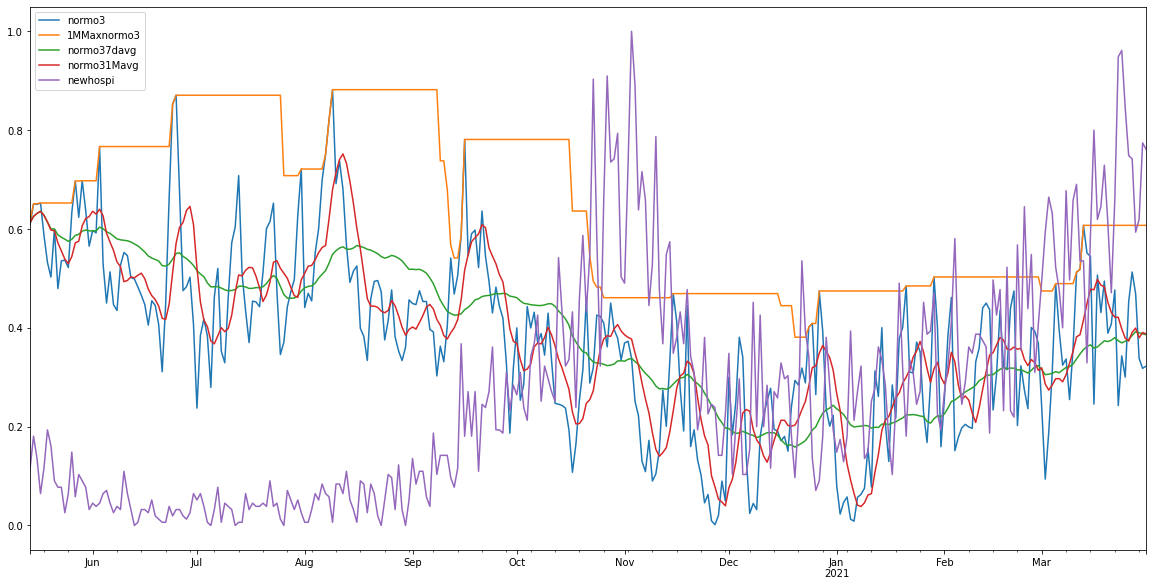

In [53]:
data = df[["numero","time","normpm25","normno2","normo3","normpm10","normco","1MMaxnormo3","normpm257davg","normno27davg","normo37davg","normpm107davg","normco7davg",\
            "normpm251Mavg","normno21Mavg","normo31Mavg","normpm101Mavg","normco1Mavg",'newhospi']]
data = data[data["numero"]==75][["normo3","1MMaxnormo3","normo37davg",\
            "normo31Mavg",'newhospi']]
data["newhospi"]=max_normalize(data["newhospi"])
idx = pd.date_range(df["time"].min(), periods= 322).tolist()
data.index = idx
data.plot.line(figsize = (20,10))

#### Departement 83: Var region PACA

<AxesSubplot:>

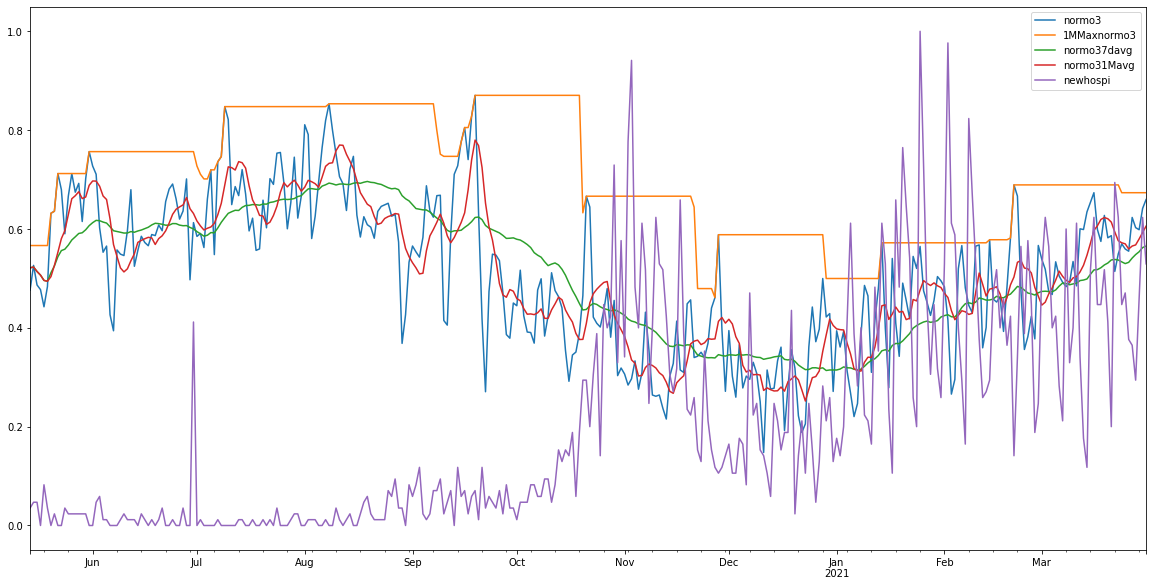

In [54]:
data = df[["numero","time","normpm25","normno2","normo3","normpm10","normco","1MMaxnormo3","normpm257davg","normno27davg","normo37davg","normpm107davg","normco7davg",\
            "normpm251Mavg","normno21Mavg","normo31Mavg","normpm101Mavg","normco1Mavg",'newhospi']]
data = data[data["numero"]==83][["normo3","1MMaxnormo3","normo37davg",\
            "normo31Mavg",'newhospi']]
data["newhospi"]=max_normalize(data["newhospi"])
idx = pd.date_range(df["time"].min(), periods= 322).tolist()
data.index = idx
data.plot.line(figsize = (20,10))

### Nitrogen dioxide (NO2) and the number of severe COVID19 cases leading to hospitalization

#### Departement 75: Paris region Ile de France

<AxesSubplot:>

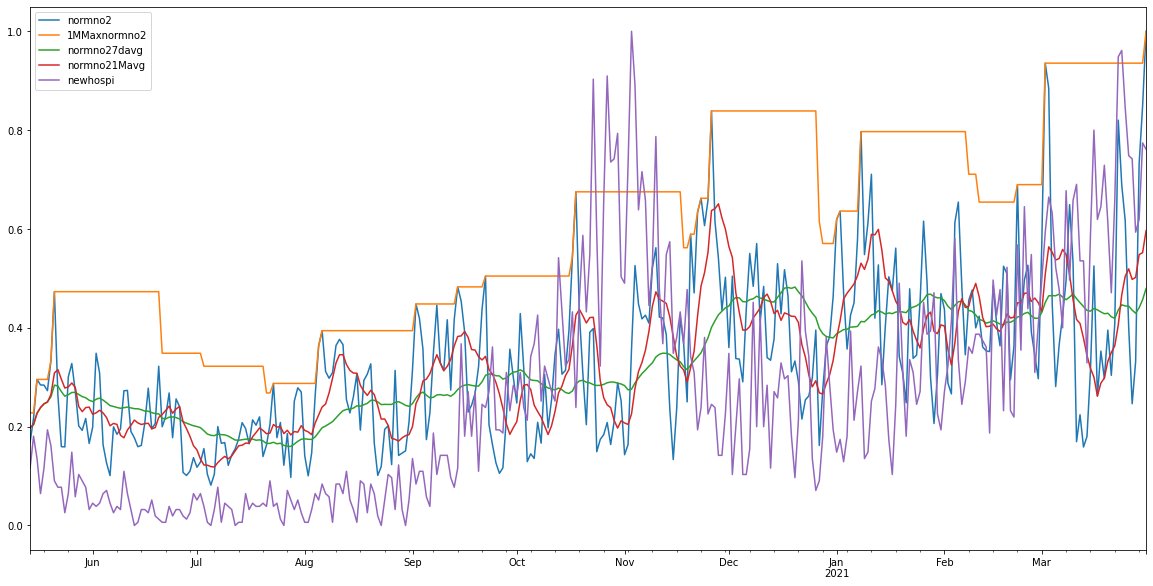

In [55]:
data = df[["numero","time","1MMaxnormno2","normpm25","normno2","normo3","normpm10","normco","1MMaxnormo3","normpm257davg","normno27davg","normo37davg","normpm107davg","normco7davg",\
            "normpm251Mavg","normno21Mavg","normo31Mavg","normpm101Mavg","normco1Mavg",'newhospi']]
data = data[data["numero"]==75][["normno2","1MMaxnormno2","normno27davg",\
            "normno21Mavg",'newhospi']]
data["newhospi"]=max_normalize(data["newhospi"])
idx = pd.date_range(df["time"].min(), periods= 322).tolist()
data.index = idx
data.plot.line(figsize = (20,10))

#### Departement 83: Var region PACA


<AxesSubplot:>

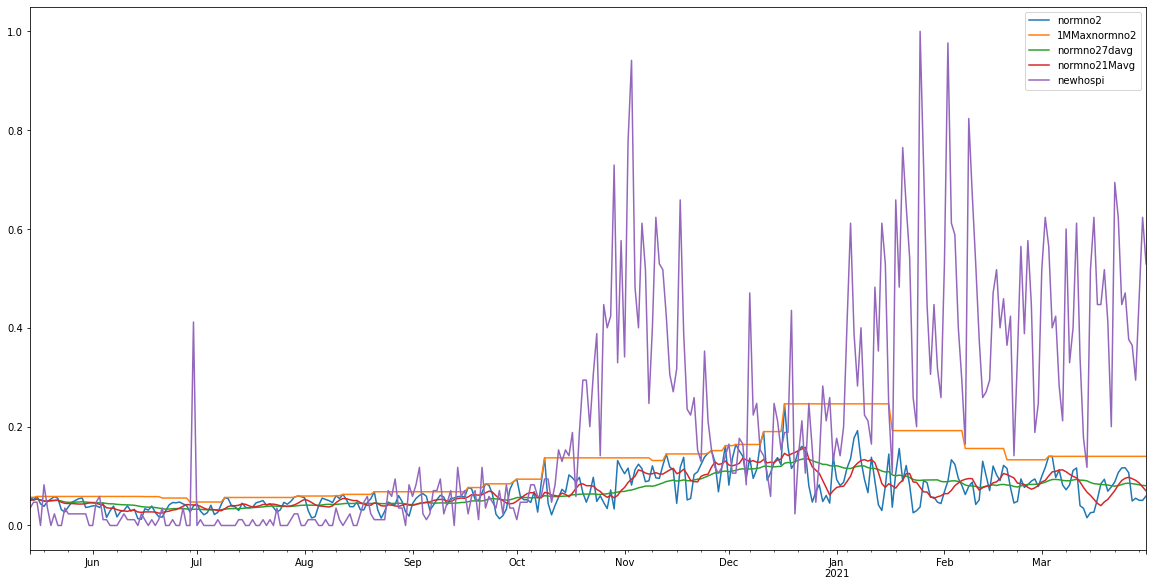

In [56]:
data = df[["numero","time","1MMaxnormno2","normpm25","normno2","normo3","normpm10","normco","1MMaxnormo3","normpm257davg","normno27davg","normo37davg","normpm107davg","normco7davg",\
            "normpm251Mavg","normno21Mavg","normo31Mavg","normpm101Mavg","normco1Mavg",'newhospi']]
data = data[data["numero"]==83][["normno2","1MMaxnormno2","normno27davg",\
            "normno21Mavg",'newhospi']]
data["newhospi"]=max_normalize(data["newhospi"])
idx = pd.date_range(df["time"].min(), periods= 322).tolist()
data.index = idx
data.plot.line(figsize = (20,10))

### PM2.5 and the number of severe COVID19 cases leading to hospitalization

#### Departement 75: Paris region Ile de France

<AxesSubplot:>

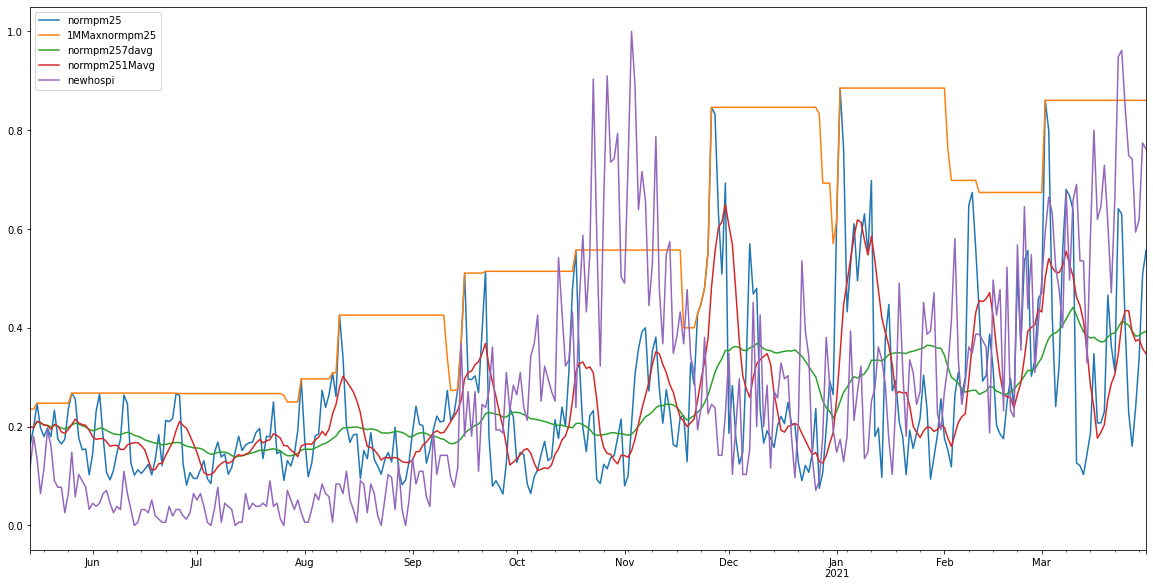

In [61]:
data = df[['1MMaxnormpm25',"numero","time","1MMaxnormno2","normpm25","normno2","normo3","normpm10","normco","1MMaxnormo3","normpm257davg","normno27davg","normo37davg","normpm107davg","normco7davg",\
            "normpm251Mavg","normno21Mavg","normo31Mavg","normpm101Mavg","normco1Mavg",'newhospi']]
data = data[data["numero"]==75][["normpm25","1MMaxnormpm25","normpm257davg",\
            "normpm251Mavg",'newhospi']]
data["newhospi"]=max_normalize(data["newhospi"])
idx = pd.date_range(df["time"].min(), periods= 322).tolist()
data.index = idx
data.plot.line(figsize = (20,10))


#### Departement 83: Var region PACA

<AxesSubplot:>

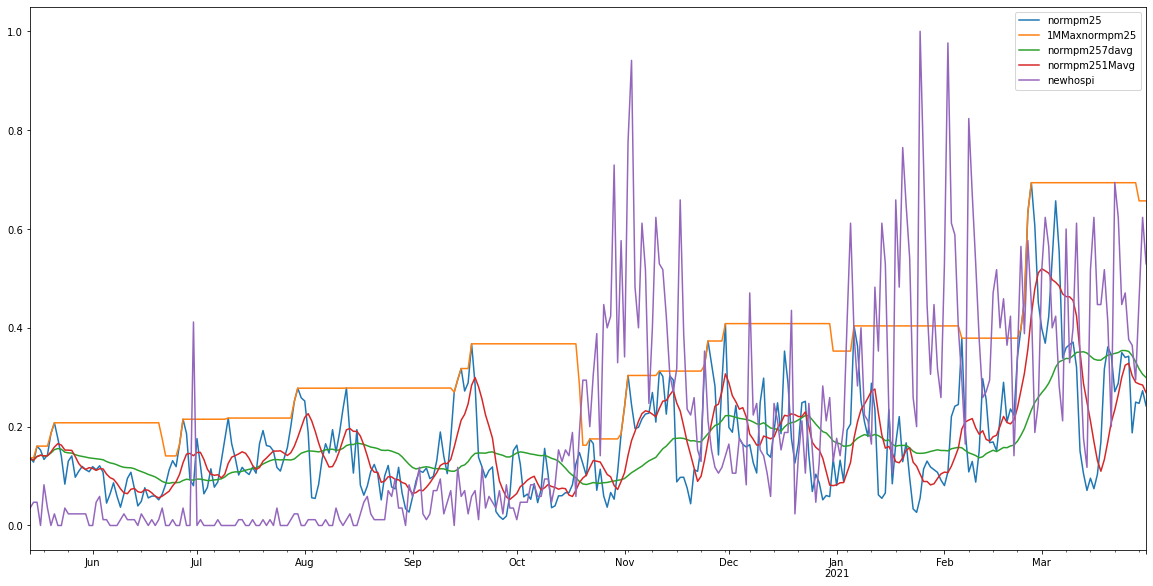

In [62]:
data = df[['1MMaxnormpm25',"numero","time","1MMaxnormno2","normpm25","normno2","normo3","normpm10","normco","1MMaxnormo3","normpm257davg","normno27davg","normo37davg","normpm107davg","normco7davg",\
            "normpm251Mavg","normno21Mavg","normo31Mavg","normpm101Mavg","normco1Mavg",'newhospi']]
data = data[data["numero"]==83][["normpm25","1MMaxnormpm25","normpm257davg",\
            "normpm251Mavg",'newhospi']]
data["newhospi"]=max_normalize(data["newhospi"])
idx = pd.date_range(df["time"].min(), periods= 322).tolist()
data.index = idx
data.plot.line(figsize = (20,10))

### The most polluted departements of France

In [186]:
print(len(sorted(list(df["nom"].unique()))))
datalist =[]
df2 = df.copy()
maximum_o3_pollution_level = df2[(df2["1MMaxo3"]==df2["1MMaxo3"].max())]
datalist.append((maximum_o3_pollution_level["nom"].unique()[0],\
                 maximum_o3_pollution_level["numero"].unique()[0],
                 maximum_o3_pollution_level["time"].min(),\
                 maximum_o3_pollution_level["1MMaxo3"].unique()[0],\
                 df2[df2["numero"]== maximum_o3_pollution_level["numero"].unique()[0]]['TotalCovidCasesCumulated'].max(),\
                 maximum_o3_pollution_level["idx"].unique()[0]))
alreadyseen = maximum_o3_pollution_level["nom"].unique()[0]
counter = 1



while (counter !=95):
    counter += 1
    df2 = df2[df2["nom"]  != alreadyseen]
    maximum_o3_pollution_level = df2[(df2["1MMaxo3"]==df2["1MMaxo3"].max())]
    datalist.append((maximum_o3_pollution_level["nom"].unique()[0],\
                     maximum_o3_pollution_level["numero"].unique()[0],
                     maximum_o3_pollution_level["time"].min(),\
                     maximum_o3_pollution_level["1MMaxo3"].unique()[0],\
                     df2[df2["nom"]==maximum_o3_pollution_level["nom"].unique()[0]]['TotalCovidCasesCumulated'].max(),
                     maximum_o3_pollution_level["idx"].unique()[0]))
                     
    
    alreadyseen = maximum_o3_pollution_level["nom"].unique()[0]

dfexport = pd.DataFrame(datalist)
dfexport.columns=["Département","Numéro","Date of pollution peak","1MMaxo3",'TotalCovidCasesCumulated',"Population Index"]
print(dfexport)
dfexport.to_csv("../research/Pollution study by departement o3 7D-TAs.csv", index = False)


95
                Département  Numéro Date of pollution peak  Max o37davg  \
0                Val-d'Oise    95.0             2020-08-09   122.889769   
1   Alpes-de-Haute-Provence     4.0             2020-08-08   119.833327   
2                 Haut-Rhin    68.0             2020-07-31   116.979563   
3                   Moselle    57.0             2020-08-10   115.873423   
4                       Ain     1.0             2020-09-18   114.506434   
..                      ...     ...                    ...          ...   
90     Pyrénées-Atlantiques    64.0             2020-08-06    94.093549   
91                     Gard    30.0             2020-05-20    93.974202   
92                     Cher    18.0             2020-07-13    93.921768   
93          Hautes-Pyrénées    65.0             2020-05-30    93.086194   
94                   Ariège     9.0             2020-05-29    90.297432   

    TotalCovidCasesCumulated  Population Index  
0                     237793         1215390.0 

In [169]:
print(len(sorted(list(df["nom"].unique()))))
datalist =[]
df2 = df.copy()
maximum_o3_pollution_level = df2[(df2["1MMaxo3"]==df2["1MMaxo3"].max())]
datalist.append((maximum_o3_pollution_level["nom"].unique()[0],\
                 maximum_o3_pollution_level["numero"].unique()[0],
                 maximum_o3_pollution_level["time"].min(),\
                 maximum_o3_pollution_level["1MMaxo3"].unique()[0],\
                 df2[df2["numero"]== maximum_o3_pollution_level["numero"].unique()[0]]["hospiprevday"].max(),\
                 maximum_o3_pollution_level["idx"].unique()[0]))
alreadyseen = maximum_o3_pollution_level["nom"].unique()[0]
counter = 1

while (counter !=95):
    counter += 1
    df2 = df2[df2["nom"]  != alreadyseen]
    maximum_o3_pollution_level = df2[(df2["1MMaxo3"]==df2["1MMaxo3"].max())]
    datalist.append((maximum_o3_pollution_level["nom"].unique()[0],\
                     maximum_o3_pollution_level["numero"].unique()[0],
                     maximum_o3_pollution_level["time"].min(),\
                     maximum_o3_pollution_level["1MMaxo3"].unique()[0],\
                     df2[df2["nom"]==maximum_o3_pollution_level["nom"].unique()[0]]["hospiprevday"].max(),
                     maximum_o3_pollution_level["idx"].unique()[0]))
                     
    
    alreadyseen = maximum_o3_pollution_level["nom"].unique()[0]

dfexport = pd.DataFrame(datalist)
dfexport.columns=["Département","Numéro","Date of pollution peak","Max 1MMaxo3","Max Total Hospitalisations","Population Index"]
print(dfexport)
dfexport.to_csv("../research/Pollution study by departement.csv", index = False)


95
                Département  Numéro Date of pollution peak  Max 1MMaxo3  \
0                Val-d'Oise    95.0             2020-08-09   122.889769   
1   Alpes-de-Haute-Provence     4.0             2020-08-08   119.833327   
2                 Haut-Rhin    68.0             2020-07-31   116.979563   
3                   Moselle    57.0             2020-08-10   115.873423   
4                       Ain     1.0             2020-09-18   114.506434   
..                      ...     ...                    ...          ...   
90     Pyrénées-Atlantiques    64.0             2020-08-06    94.093549   
91                     Gard    30.0             2020-05-20    93.974202   
92                     Cher    18.0             2020-07-13    93.921768   
93          Hautes-Pyrénées    65.0             2020-05-30    93.086194   
94                   Ariège     9.0             2020-05-29    90.297432   

    Max Total Hospitalisations  Population Index  
0                        751.0         121539

## The Model: Scikit Learn's ExtratreesRegressor

In [63]:
df.columns

Index(['nom', 'numero', 'time', 'hospi', 'reanim', 'newhospi', 'newreanim',
       'deces', 'gueris', 'dep_num', 'lon', 'lat', 'name', 'captial', 'area',
       'total', 'density', 'idx', 'pm25', 'no2', 'o3', 'co', 'pm10',
       'longitude', 'latitude', '1MMaxpm25', '1MMaxno2', '1MMaxo3',
       '1MMaxpm10', '1MMaxco', 'pm257davg', 'no27davg', 'o37davg', 'pm107davg',
       'co7davg', 'pm251Mavg', 'no21Mavg', 'o31Mavg', 'pm101Mavg', 'co1Mavg',
       'hospiprevday', 'Region_x', 'Departement_x', 'depnum_x', 'ds',
       'country', 'polygon_source', 'polygon_id', 'polygon_name',
       'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users', 'baseline_name', 'baseline_type',
       'dep', 'jour', 'P', 'covidpostestprevday', 'vac1nb', 'vac2nb',
       'Code département', 'Insuffisance respiratoire chronique grave (ALD14)',
       'Insuffisance cardiaque grave, troubles du rythme graves, cardiopathies valvulaires graves, cardiopathies congénitales graves (AL

In [173]:


X1=df[['idx', 'pm25', 'no2']]
X2=df[features]

y= df['newhospi']

# Hold-out
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.33)
print("\n")

print(" Scikit Learn ExtratreesRegressor")
ETregr = ExtraTreesRegressor()
ETregr.fit(X_train2, y_train2)
predET = ETregr.predict(X_test2).round(0)
predETdf = pd.DataFrame(predET)
predETdf.columns = ["prednewhospi"]
featuresandtargetdf = X_test2.merge(y_test2, left_on = X_test2.index, right_on = y_test2.index)
featuresandtargetdf["prednewhospi"]=predETdf["prednewhospi"].round(0)
featuresandtargetdf.to_csv("../predictions/fr/new_hospi_predictions.csv", index = False)
ETMSE = mse(y_test2, predET)
ETMAE = mae(y_test2, predET)

print("MSE")
print(ETMSE)
print("MAE")
print(ETMAE)
print("\n")


print("T-Pot exported current best pipeline")
# Average CV score on the training set was: -94.5319545151712
#exported_pipeline = ExtraTreesRegressor(bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=1, min_samples_split=4, n_estimators=100)
exported_pipeline = make_pipeline(
    StandardScaler(),
    RobustScaler(),
    GradientBoostingRegressor(alpha=0.75, learning_rate=0.1, loss="ls", max_depth=8, max_features=0.35000000000000003, min_samples_leaf=14, min_samples_split=18, n_estimators=100, subsample=0.9500000000000001)
)
#Fix random state for all the steps in exported pipeline
#set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(X_train2, y_train2)
predictions = exported_pipeline.predict(X_test2)
TPOTMSE = mse(y_test2, predictions)
TPOTMAE = mae (y_test2, predictions)
print("MSE:")
print(TPOTMSE)
print("MAE:")
print(TPOTMAE)
print("\n")

# print("Scikit Learn RandomForestRegressor without feature engineering")
# regr = RandomForestRegressor()
# regr.fit(X_train, y_train)
# pred = regr.predict(X_test).round(0)
# RFRMSE = mse(y_test, pred)
# print(RFRMSE)
# print("Average error on new number of hospitalizations per day:", round(RFRMSE ** 0.5,0))
#print("\n")

# print(" Scikit Learn RandomForestRegressor")
# regr2 = RandomForestRegressor()
# regr2.fit(X_train2, y_train2)
# pred2 = regr2.predict(X_test2).round(0)
# RFRMSE2 = mse(y_test2, pred2)
# RFMAE2 = mae(y_test2, pred2)
# print("MSE:")
# print(RFRMSE2)
# print("MAE")
# print(RFMAE2)
# print("\n")

# print("GradientBoostingRegressor Model")
# model = GradientBoostingRegressor(
#     n_estimators=100, 
#     learning_rate=0.1
# )
# model.fit(X_train2,y_train2)
# pred4 = model.predict(X_test2).round(0)
# MSE4 = mse(y_test2, pred4)
# MAE4 = mae(y_test2, pred4)
# print("MSE:")
# print(MSE4)
# print("MAE:")
# print(MAE4)



# print("\n")
# print("DecisionTreeRegressor Model")
# regr2 = DecisionTreeRegressor()
# regr2.fit(X_train2, y_train2)
# pred2 = regr2.predict(X_test2).round(0)
# RFRMSE2 = mse(y_test2, pred2)
# print(RFRMSE2)
# print("Average error on new number of hospitalizations per day:", round(RFRMSE2 ** 0.5,0))

print("\n")
print("XGBoost Regressor Model")
xgb_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

xgb_model.fit(X_train2, y_train2)
pred3 = xgb_model.predict(X_test2).round(0)
RFRMSE3 = mse(y_test2, pred3)
XGBMAE = mae(y_test2, pred3)
print("MSE:")
print(RFRMSE3)
print("MAE:")
print(XGBMAE)
print("\n")

print("VotingRegressor")
ensemble = VotingRegressor(
    estimators = [("TPET",exported_pipeline),("xgbr",xgb_model)],
   )

ensemble.fit(X_train2, y_train2)
predvot = ensemble.predict(X_test2).round(0)
MSE5 = mse(y_test2,predvot)
MAE5 = mae(y_test2,predvot)
print("MSE:")
print(MSE5)
print("MAE:")
print(MAE5)
for alg in ensemble.named_estimators:
    clf = ensemble.named_estimators[alg]
    # extract feature importance for clf
    # Note different algorithms have different 
    # methods for feature importance
    print(clf)
    
print("\n")





 Scikit Learn ExtratreesRegressor
MSE
47.020901436354634
MAE
3.6122833085685984


T-Pot exported current best pipeline
MSE:
42.4420262829502
MAE:
3.5153649984377124




XGBoost Regressor Model
MSE:
45.40891530460624
MAE:
3.5794947994056465


VotingRegressor
MSE:
43.02892521050025
MAE:
3.478652798415057
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('robustscaler', RobustScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.75, max_depth=8,
                                           max_features=0.35000000000000003,
                                           min_samples_leaf=14,
                                           min_samples_split=18,
                                           subsample=0.9500000000000001))])
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_cons

In [68]:
X2

,idx,pm25,no2,o3,pm10,co,pm257davg,no27davg,o37davg,co7davg,...,1MMaxpm25,1MMaxpm10,1MMaxo3,1MMaxno2,1MMaxco,pm251Mavg,no21Mavg,o31Mavg,pm101Mavg,co1Mavg
159,657907.0,6.737591,3.484633,82.740733,12.517437,131.057597,6.403713,5.084454,51.549126,178.662710,...,10.016783,13.785627,82.740733,9.032311,203.934978,5.228379,5.174142,51.683668,7.714685,161.415241
160,657907.0,10.844402,5.787471,66.039559,17.847794,135.610097,7.047588,5.004027,55.780852,171.092193,...,10.844402,17.847794,82.740733,9.032311,203.934978,5.360754,5.177500,51.927030,7.978897,160.704224
161,657907.0,6.681308,7.628235,54.798256,10.070128,162.365053,7.302892,5.236041,58.933208,167.844755,...,10.844402,17.847794,82.740733,9.032311,203.934978,5.394663,5.255842,51.860062,8.055877,161.068313
162,657907.0,4.785762,5.027647,48.535472,6.236821,165.936881,7.047602,4.988554,61.517733,163.712759,...,10.844402,17.847794,82.740733,9.032311,203.934978,5.351164,5.262830,51.057462,7.976917,161.811620
163,657907.0,4.631508,3.952503,56.842632,6.784782,147.072636,6.833717,4.914990,62.737708,155.589567,...,10.844402,17.847794,82.740733,9.032311,203.934978,5.372148,5.253405,50.876127,7.991394,162.187255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30490,1260269.0,6.100140,6.627001,70.229467,11.613934,185.482428,14.467708,16.237065,58.907952,210.161923,...,34.844152,53.422224,80.500790,51.599818,343.299021,14.580851,14.493739,56.915039,21.526604,207.123258
30491,1260269.0,8.425896,9.099569,68.209629,13.743489,193.139682,13.912282,16.429180,59.975429,212.799404,...,34.844152,53.422224,80.500790,51.599818,343.299021,14.195306,14.223872,57.801110,20.640382,206.960739
30492,1260269.0,13.033086,29.526526,54.441418,18.517216,237.388093,14.180923,19.142370,57.971645,217.938592,...,34.844152,53.422224,80.500790,51.599818,343.299021,14.249303,14.775230,57.704602,20.672684,207.544318
30493,1260269.0,21.792762,51.437356,40.131381,30.011262,307.382279,13.775409,21.747143,57.702312,221.278882,...,34.844152,53.422224,80.500790,51.599818,343.299021,14.525749,16.057324,57.291931,20.997907,210.476992


In [174]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

exported_pipeline = make_pipeline(
    StandardScaler(),
    RobustScaler(),
    GradientBoostingRegressor(alpha=0.75, learning_rate=0.1, loss="ls", max_depth=8, max_features=0.33, min_samples_leaf=14, min_samples_split=18, n_estimators=100, subsample=0.9500000000000001)
)
xgb_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

ensemble = VotingRegressor(
    estimators = [("TPET",exported_pipeline),("xgbr",xgb_model)],
   )
scores = cross_validate(ensemble, X2, y, cv=5,
                        scoring=('neg_mean_squared_error'),
                         return_train_score=True)
print(scores)

{'fit_time': array([29.35602951, 29.59534717, 30.15735745, 30.13910437, 30.22629261]), 'score_time': array([0.07621694, 0.06238747, 0.0616436 , 0.06288314, 0.07229781]), 'test_score': array([ -97.24638106,  -71.74570873,  -20.15645543,  -17.25232198,
       -159.45660525]), 'train_score': array([-14.40091528, -15.33284056, -19.11990162, -18.401409  ,
       -14.17818718])}


In [175]:
print(scores["test_score"].mean())

-73.1714944876279


In [12]:
ensemble.fit(X_train2, y_train2)

VotingRegressor(estimators=[('TPET',
                             ExtraTreesRegressor(max_features=0.7000000000000001,
                                                 min_samples_split=4)),
                            ('xgbr',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.25, max_delta_step=0,
                                          max_depth=6, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=1,
    

In [180]:
exported_pipeline = ExtraTreesRegressor(bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=1, min_samples_split=4, n_estimators=100)

xgb_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

exported_pipeline.fit(X_train2,y_train2)
xgb_model.fit(X_train2,y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Scikit Learn - Extra Trees Regressor Feature importance report: [0.03786605 0.0038094  0.00543121 0.0055223  0.00473221 0.00592964
 0.00787585 0.02185845 0.0336928  0.01604949 0.00691878 0.00401561
 0.00494725 0.00575805 0.00430912 0.00721103 0.28846396 0.28142024
 0.00947327 0.02188922 0.0046694  0.00444635 0.0453827  0.02067373
 0.00766205 0.02424126 0.00542185 0.00265192 0.01185202 0.00721582
 0.02178643 0.01780879 0.01569396 0.00450253 0.00655693 0.0075996
 0.00436447 0.01029628]
                                                index  feature_importance
27                                  Nb_susp_501Y_V2_3            0.002652
1                                                pm25            0.003809
11                                           normpm25            0.004016
14                                           normpm10            0.004309
36                                          pm101Mavg            0.004364
21                                             vac2nb            0.

<Figure size 900x600 with 0 Axes>

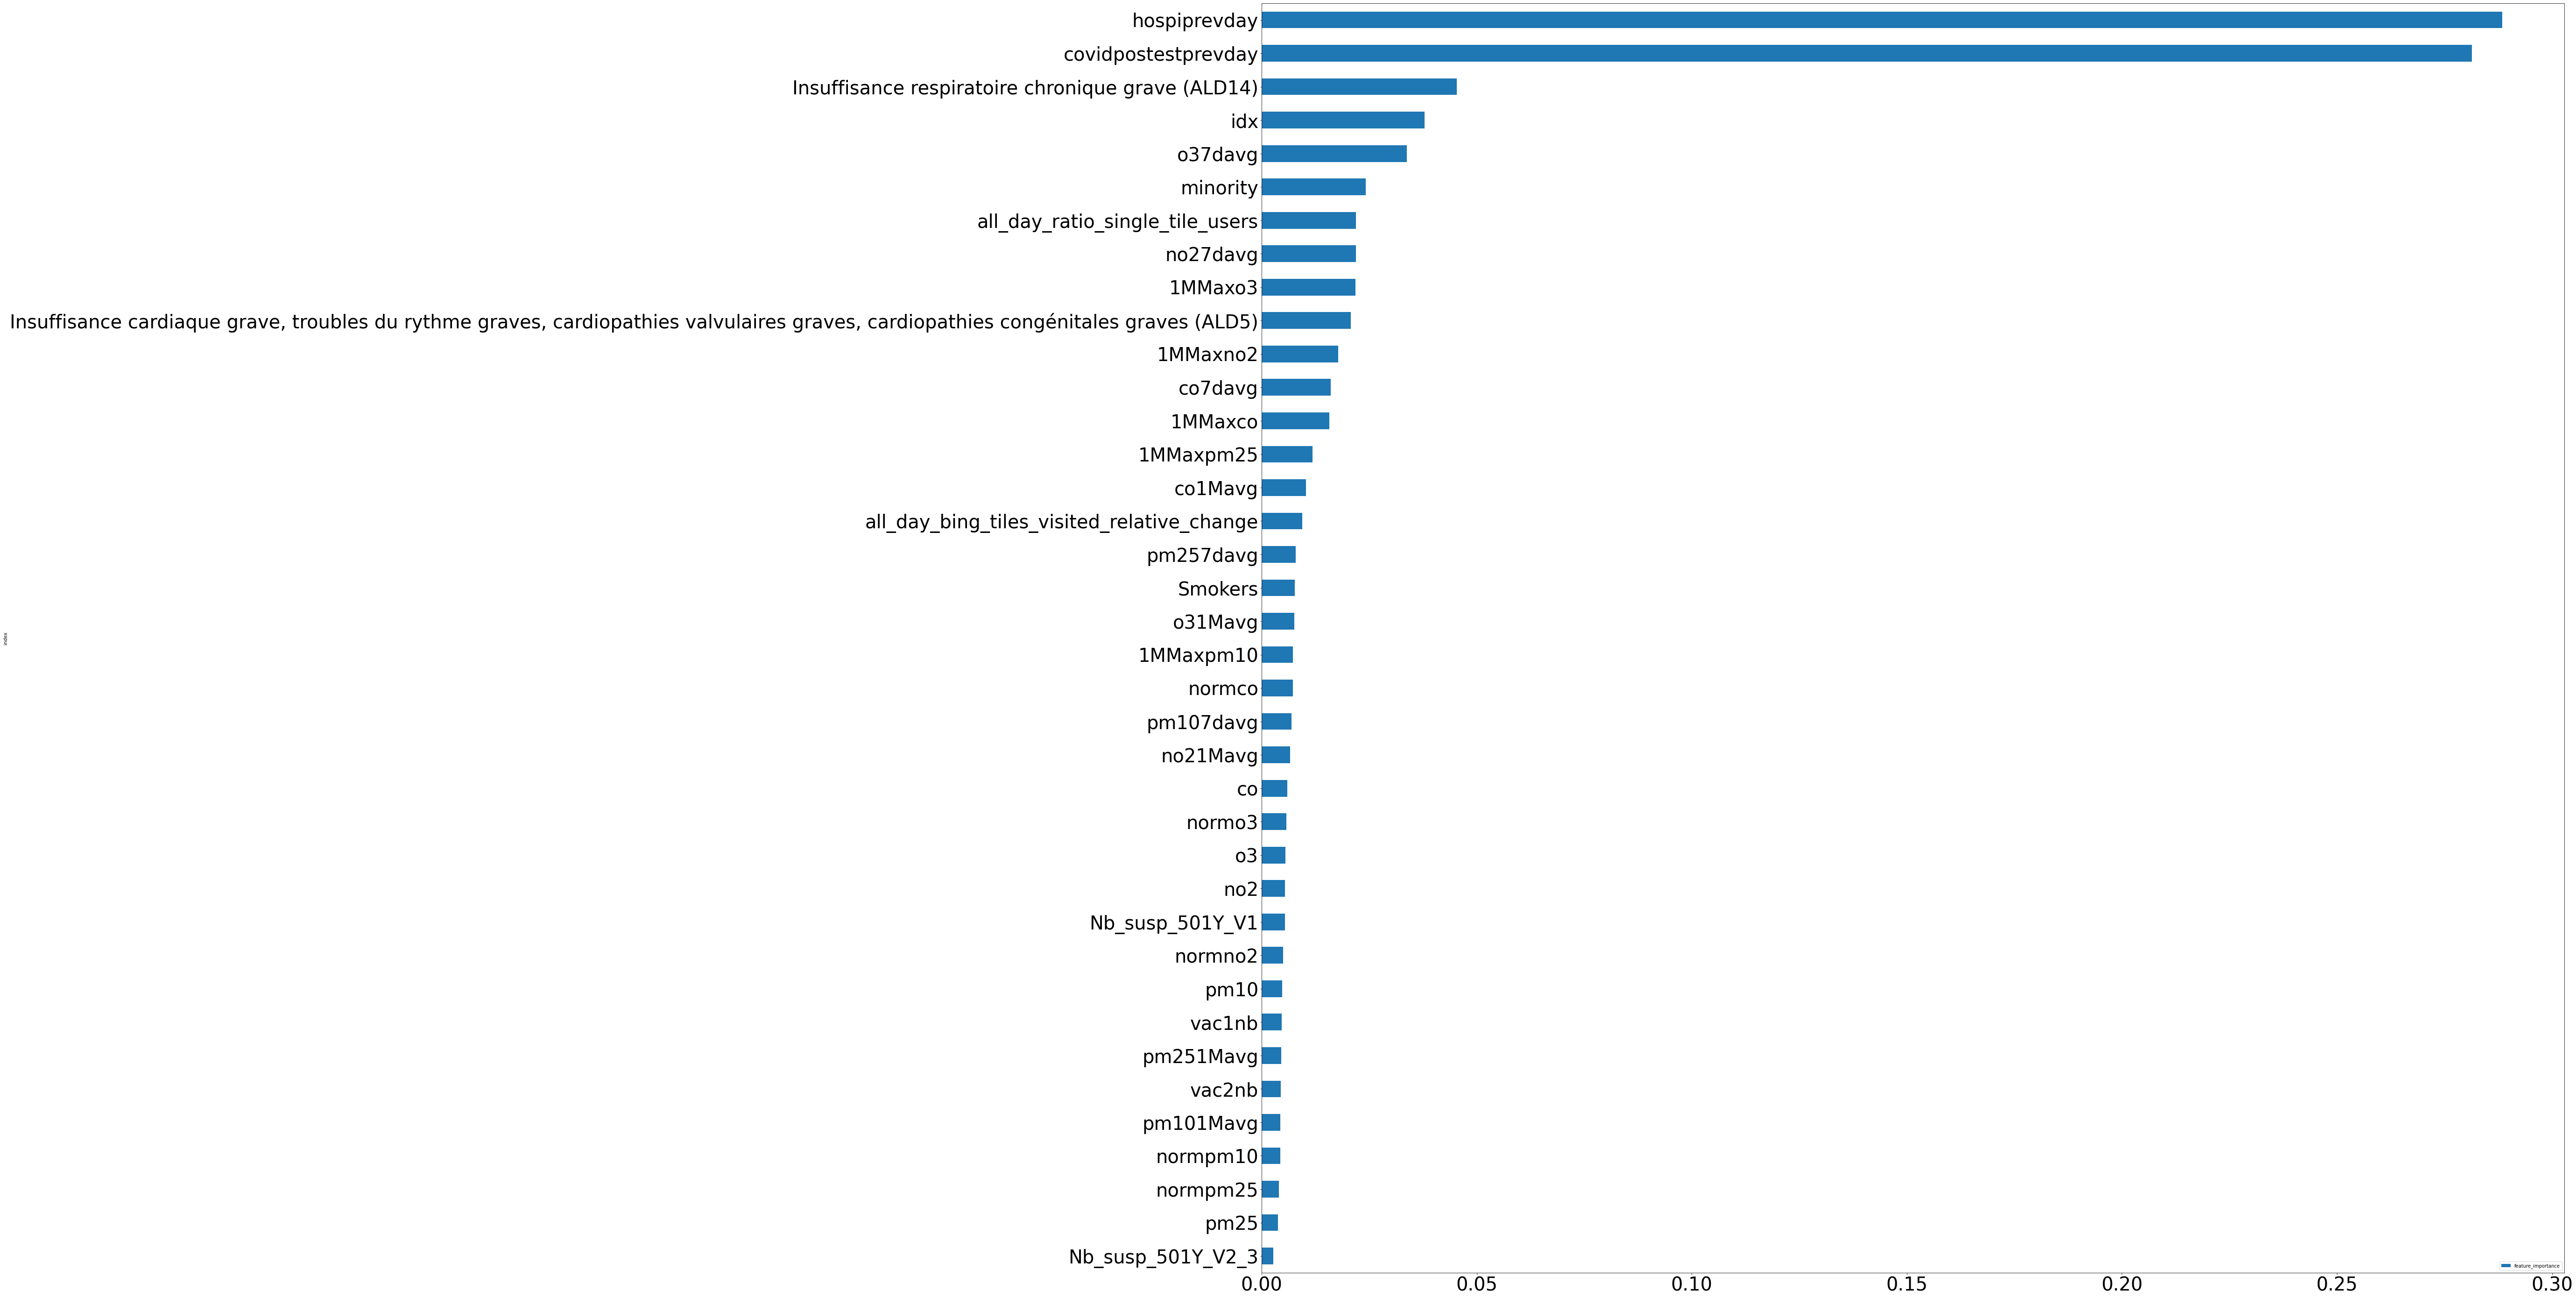

XGBoost- Extreme Gradient Regressor Feature importance report: [0.00513989 0.00455359 0.006452   0.00571167 0.00606667 0.00584859
 0.00998074 0.01271825 0.03311605 0.01462929 0.01233708 0.
 0.         0.         0.         0.         0.23605552 0.37104738
 0.00830967 0.02943502 0.02041006 0.00938309 0.01375836 0.01226947
 0.00746795 0.01324187 0.0168986  0.02976404 0.02237879 0.01300518
 0.02611438 0.00851423 0.0085606  0.00509552 0.00604504 0.00761859
 0.00680176 0.01127117]
                                                index  feature_importance
11                                           normpm25            0.000000
12                                            normno2            0.000000
13                                             normo3            0.000000
14                                           normpm10            0.000000
15                                             normco            0.000000
1                                                pm25            0.004554
3

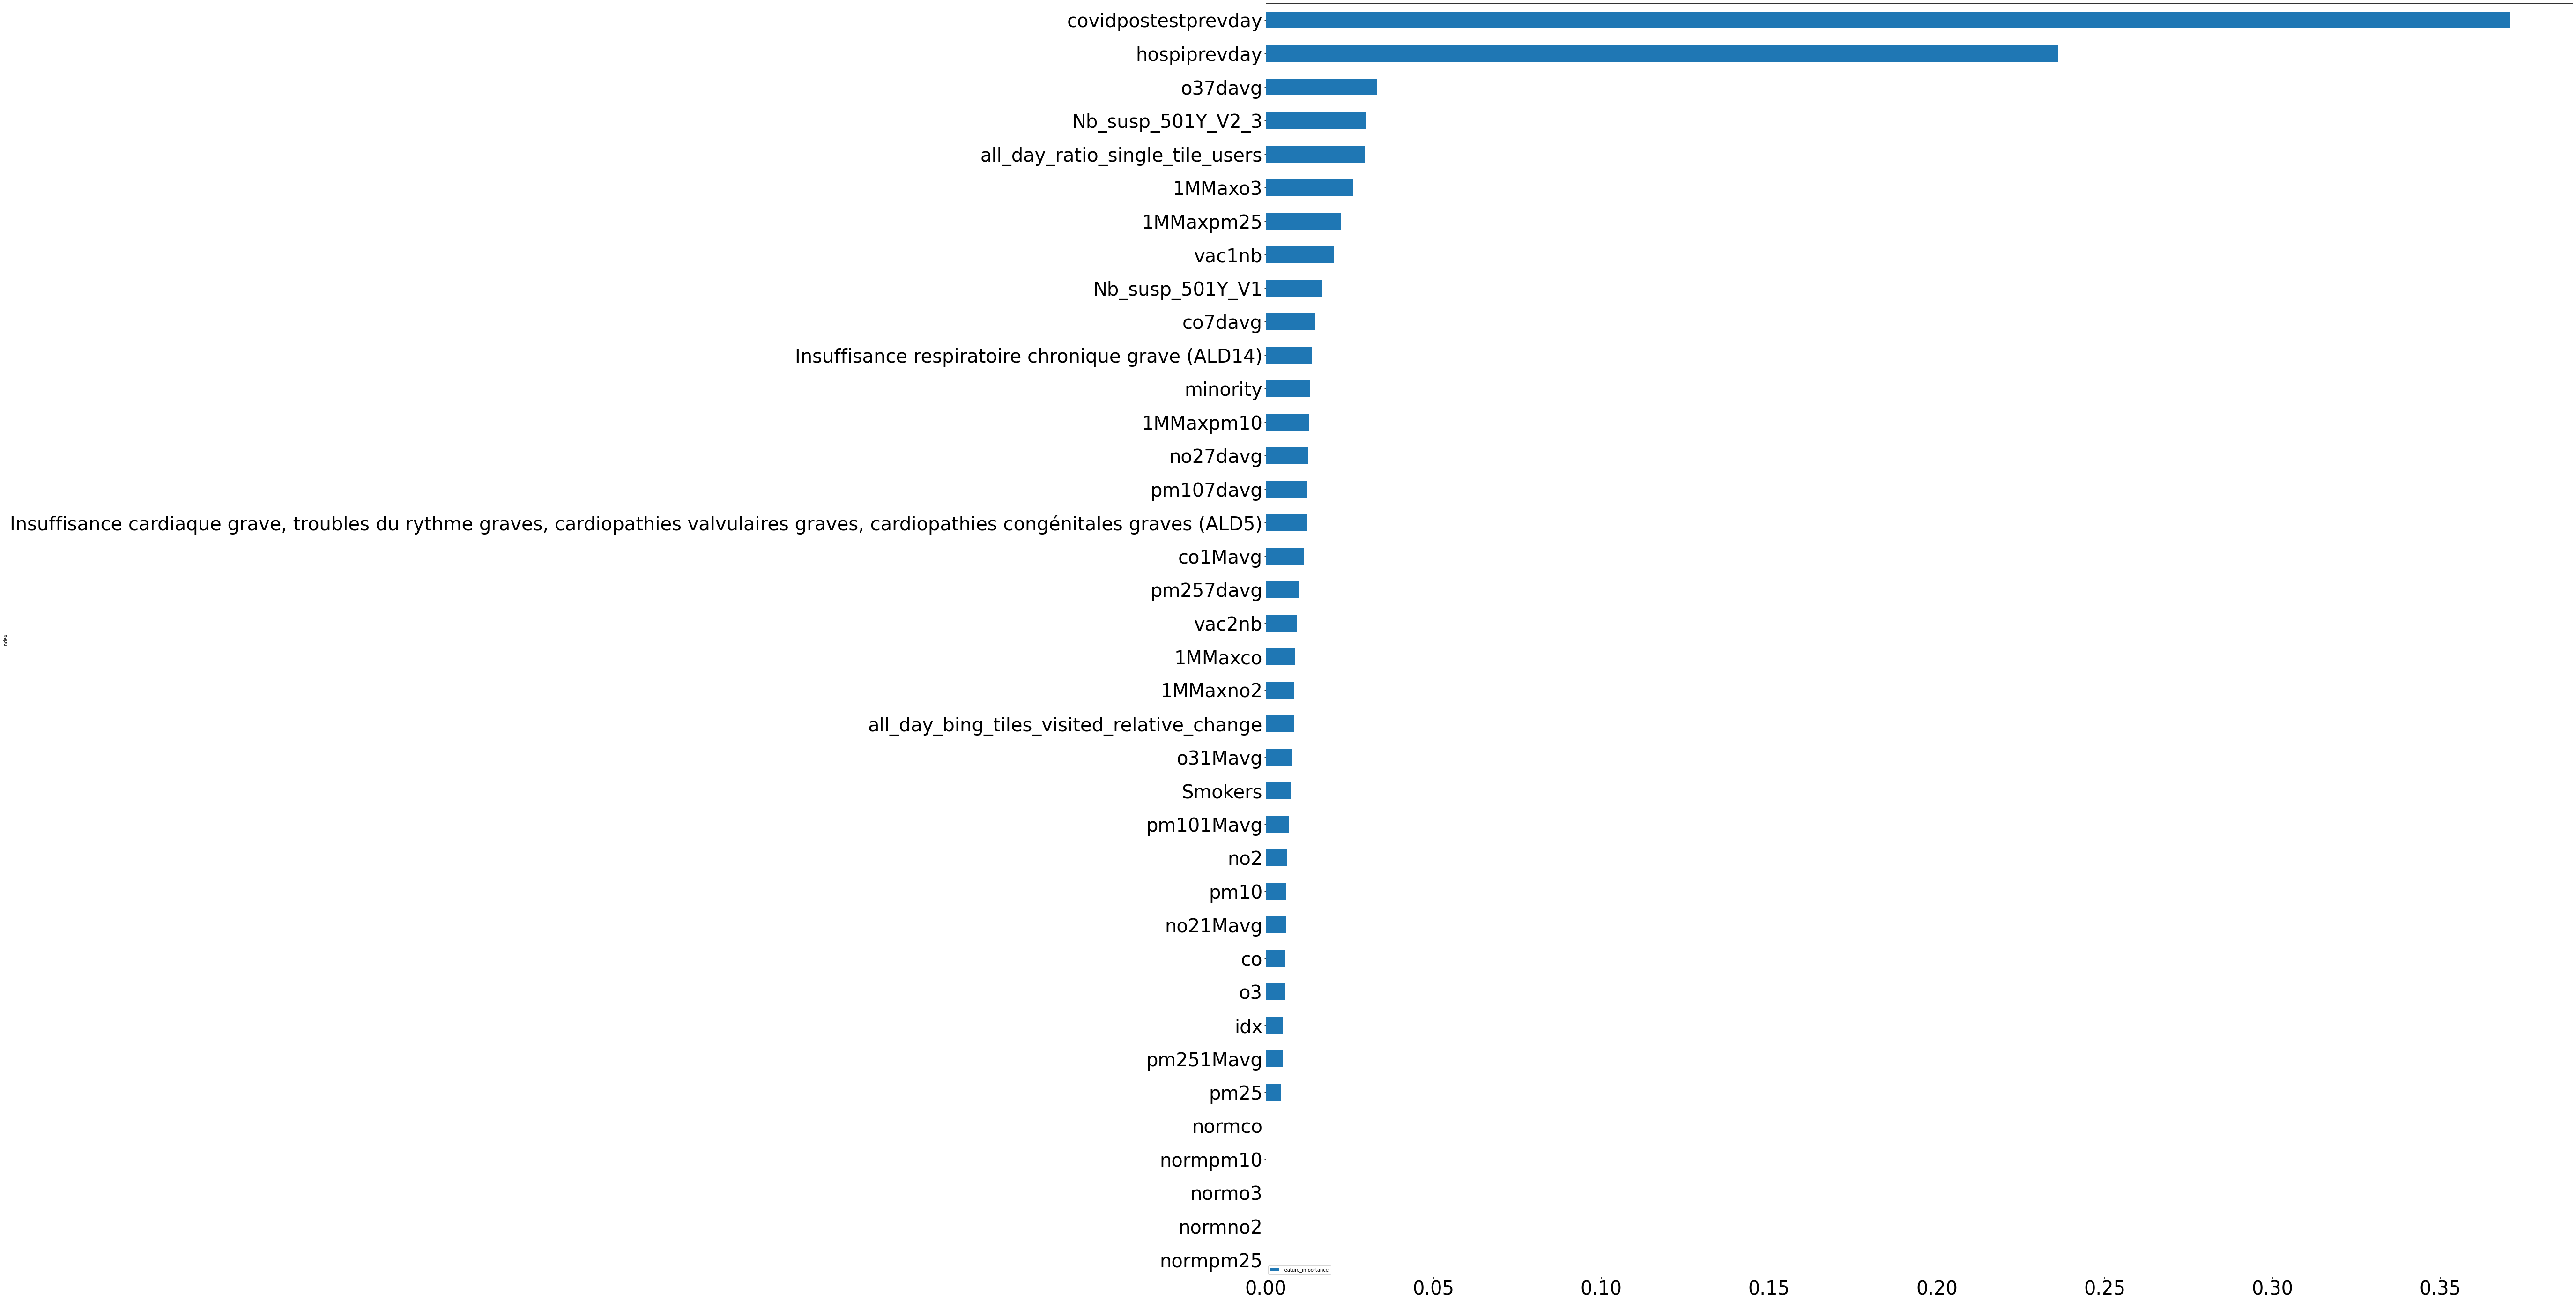

In [181]:
print("Scikit Learn - Extra Trees Regressor Feature importance report:", exported_pipeline.feature_importances_)
FIlist = exported_pipeline.feature_importances_.tolist()
FIlistdf = pd.DataFrame(FIlist)
FIlistdf = FIlistdf.T
FIlistdf.columns = features
FIlistdf = FIlistdf.T.reset_index()
FIlistdf.columns = ["index","feature_importance"]
FIlistdf.sort_values(by = ["feature_importance"], inplace = True, ascending =True)
print(FIlistdf)
print("\n")
fig = plt.figure(dpi = 150)
plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 
FIlistdf.plot.barh(x="index", y="feature_importance",figsize = (50,50))
plt.show() 


print("XGBoost- Extreme Gradient Regressor Feature importance report:", xgb_model.feature_importances_)
FIlist = xgb_model.feature_importances_.tolist()
FIlistdf = pd.DataFrame(FIlist)
FIlistdf = FIlistdf.T
FIlistdf.columns = features
FIlistdf = FIlistdf.T.reset_index()
FIlistdf.columns = ["index", "feature_importance"]
FIlistdf.sort_values(by = ["feature_importance"], inplace = True, ascending = True)
print(FIlistdf)
print("\n")
#plt.rc('xtick', labelsize=40) 
#plt.rc('ytick', labelsize=40)
FIlistdf.plot.barh(x="index", y="feature_importance", figsize = (50,50))
plt.show() 


In [15]:
features3 = ["covidpostestprevday","hospiprevday","1MMaxo3","all_day_ratio_single_tile_users","Nb_susp_501Y_V1","Nb_susp_501Y_V2_3"]

In [164]:
#X3=df[features3]
X3 = df[features]
y= df['newhospi']
# Hold-out
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.33,random_state = 84)
print("\n")

In [165]:
xgb_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [167]:
scores = cross_validate(xgb_model, X3, y, cv=10,
                        scoring=('neg_mean_squared_error',"neg_mean_absolute_error"),
                         return_train_score=True)
print(scores)

{'fit_time': array([19.38829923, 20.73215079, 18.65006685, 19.04862523, 20.56581616,
       20.45735741, 22.79048681, 22.88541961, 18.77141023, 21.34915376]), 'score_time': array([0.02685785, 0.02912736, 0.03088164, 0.02620435, 0.02606368,
       0.02458429, 0.0273428 , 0.02593207, 0.02537632, 0.03118873]), 'test_neg_mean_squared_error': array([ -72.16498663, -134.48321038, -109.03319979,  -51.58415162,
        -13.22169265,  -27.33822667,  -15.3694266 ,  -20.16994798,
        -27.69660812, -393.68991688]), 'train_neg_mean_squared_error': array([-15.43372036, -14.8823432 , -15.29108414, -15.95729392,
       -18.12272365, -17.18498988, -17.25651992, -16.84302373,
       -16.99234368, -13.20797169]), 'test_neg_mean_absolute_error': array([ -4.62170689,  -6.67391847,  -5.52367372,  -4.36497886,
        -2.07417982,  -3.05303835,  -2.26532026,  -2.72736244,
        -3.13604737, -12.72897835]), 'train_neg_mean_absolute_error': array([-2.47409185, -2.40505281, -2.44143572, -2.49405212, -2.67

In [168]:
print(scores["test_neg_mean_squared_error"].mean())
print(scores["test_neg_mean_absolute_error"].mean())

-86.47513673254674
-4.716920453195051


In [85]:
exported_pipeline = ExtraTreesRegressor(n_estimators=70, n_jobs=4, min_samples_split=11,
                            min_samples_leaf=1, max_features=0.94589)


In [94]:
print(scores["test_neg_mean_squared_error"].mean())
print(scores["test_neg_mean_absolute_error"].mean())

-102.35755868985419
-6.663465925984862


In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

In [ ]:
#from sklearn.model_selection import GridSearchCV
#print(exported_pipeline.get_params)
#parameters = {'max_features': np.arange(0,1,0.01), 'min_samples_split': np.arange(0,10,1)}
#ET = ExtraTreesRegressor()
#clf = GridSearchCV(ET, parameters)
#clf.fit(X_train2, y_train2)
#print(sorted(clf.cv_results_.keys()))

In [ ]:
featuresmini = ["hospiprevday",\
"covidpostestprevday",\
"idx",\
"1MMaxo3",\
"o31Mavg",\
"Insuffisance cardiaque grave, troubles du rythme graves, cardiopathies valvulaires graves, cardiopathies congénitales graves (ALD5)",\
"all_day_ratio_single_tile_users",\
"Insuffisance respiratoire chronique grave (ALD14)",\
"1MMaxno2",\
"minority",\
"co1Mavg",\
"no21Mavg",\
"pm251Mavg",\
"all_day_bing_tiles_visited_relative_change",\
"co7davg",\
"1MMaxco",\
"no27davg",\
"Nb_susp_501Y_V1"]


In [176]:
from sklearn.model_selection import GridSearchCV
X_train_mini = X_train2[features]
X_test_mini = X_test2[features]
model = ExtraTreesRegressor(n_estimators=70, n_jobs=4, min_samples_split=11,
                            min_samples_leaf=1, max_features=0.94589)
                            
# gsc = GridSearchCV(
#     estimator=model,
#     param_grid={
#         #'n_estimators': range(69,71,1)
#         #'max_features': np.arange(float(0.944),float(0.946),0.0001),
#         #min_samples_leaf': range(1,10,1),
#         #'min_samples_split': range(10,12,1),
#     },
#     scoring=('neg_mean_squared_error'),
#     cv=5
# )

# grid_result = gsc.fit(X_train2, y_train2)

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# print(grid_result.cv_results_)
# #for test_mean, train_mean, param in zip(
#        grid_result.cv_results_['mean_test_score'],
#        grid_result.cv_results_['mean_train_score'],
#        grid_result.cv_results_['params']):
#    print("Train: %f // Test : %f with: %r" % (train_mean, test_mean, param))
    
# model = ExtraTreesRegressor(**grid_result.best_params_)

model.fit(X_train_mini, y_train2)
predictions = model.predict(X_test_mini)
print("MSE")
print(mse(y_test2, predictions))
print("MAE")
print(mae(y_test2, predictions))






MSE
43.801929863159344
MAE
3.5710925027432143


Scikit Learn - Extra Trees Regressor Feature importance report:
                                                index  feature_importance
27                                  Nb_susp_501Y_V2_3            0.002173
1                                                pm25            0.002297
4                                                pm10            0.002307
11                                           normpm25            0.002407
14                                           normpm10            0.002461
36                                          pm101Mavg            0.002588
33                                          pm251Mavg            0.002654
34                                           no21Mavg            0.002840
21                                             vac2nb            0.002937
2                                                 no2            0.002986
3                                                  o3            0.003308
12                                            no

<Figure size 900x600 with 0 Axes>

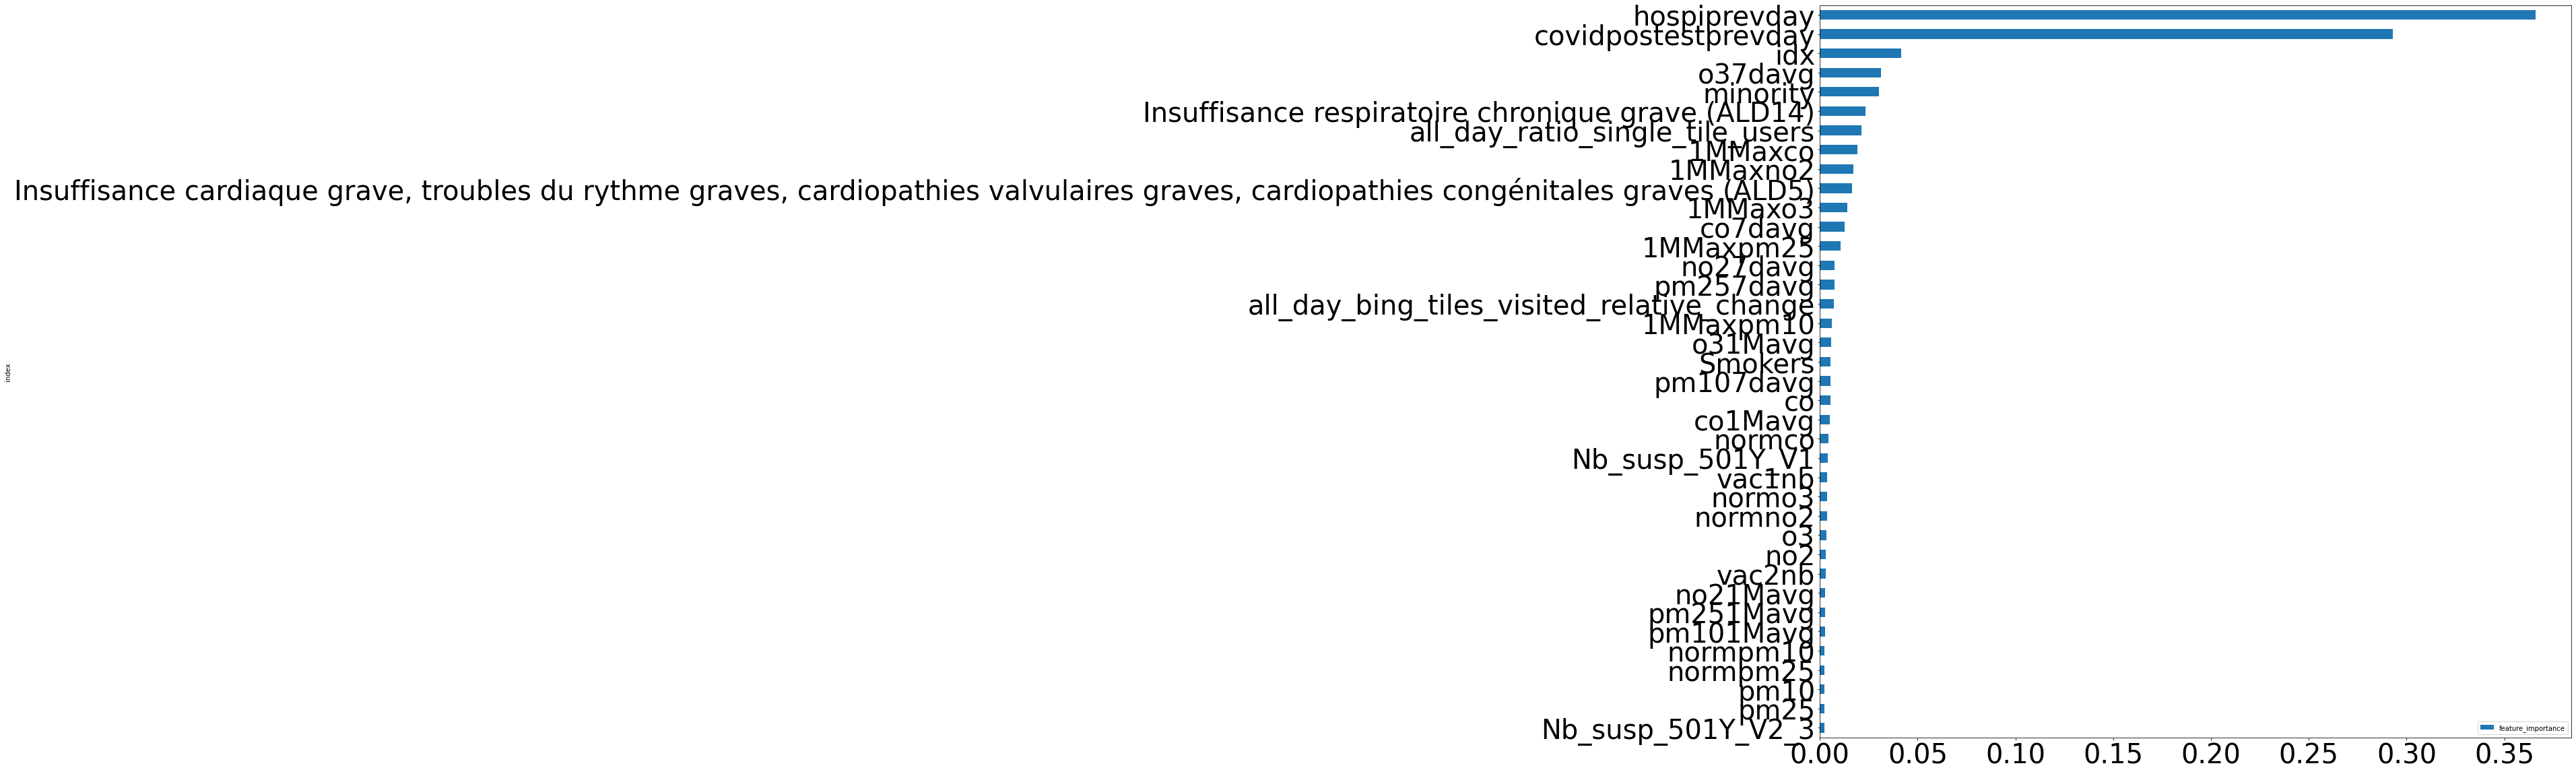

In [178]:
print("Scikit Learn - Extra Trees Regressor Feature importance report:")
FIlist = model.feature_importances_.tolist()
FIlistdf = pd.DataFrame(FIlist)
FIlistdf = FIlistdf.T
FIlistdf.columns = features
FIlistdf = FIlistdf.T.reset_index()
FIlistdf.columns = ["index","feature_importance"]
FIlistdf.sort_values(by = ["feature_importance"], inplace = True, ascending =True)
FIlistdf.to_csv("../feature_importance_Extra_Trees.csv")
print(FIlistdf)
print("\n")
fig = plt.figure(dpi = 150)
plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 
FIlistdf.plot.barh(x="index", y="feature_importance",figsize = (20,20))
plt.show() 

In [59]:




#Save model to .joblib file
# save the model to disk
filename = '../model/model.joblib'
joblib.dump(ensemble, filename)
 
# # some time later...
 
# # load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)
# print(result)



print("\n")
print("TPOTRegressor")
tpot = TPOTRegressor(generations=50, population_size=50, verbosity=1, random_state=42)
tpot.fit(X_train2, y_train2)
print(tpot.score(X_test2, y_test2))
tpot.export('tpot_covid_pipeline.py')

print("\n")




TPOTRegressor


Version 0.11.6.post1 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.




TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=100)
-50.109349638278964




In [ ]:
print("Neural Network")
X_trainNN = X_train2.values.reshape(X_train2.shape[0], X_train2.shape[1], 1)
y_trainNN = y_train2.values
X_testNN = X_test2.values.reshape(X_test2.shape[0],X_test2.shape[1],1)
y_testNN = y_test2.values
NNmodel = Sequential()
#NNmodel.add(layers.Dense(215, input_shape=(X_trainNN.shape[0], X_trainNN.shape[1])))
NNmodel.add(layers.LSTM(units=22, activation='tanh',return_sequences=True, input_shape=X_trainNN.shape[1:]))
NNmodel.add(layers.LSTM(units=10, activation='tanh', return_sequences=False))
NNmodel.add(layers.Dense(1, activation="linear"))

# The compilation
NNmodel.compile(loss='mse', 
              optimizer='rmsprop')

es = callbacks.EarlyStopping(patience=30, restore_best_weights=True)

# The fit
NNmodel.fit(X_trainNN, y_trainNN,
         batch_size=16, validation_split = 0.3,
         epochs=100, verbose=1,callbacks=[es])

# The prediction
print("MSE:")
print(NNmodel.evaluate(X_testNN, y_testNN, verbose=0))

#print('validation loss (MSE):', val_loss, '\n validation MAE:', val_mae)
#print("Average error on new number of hospitalizations per day:", round(val_mae ** 0.5,0))